In [1]:
# passo a passo

# passo 1 - importar bibliotecas
# passo 2 - carregar dados
# passo 3 - explorar os dados
# passo 4 - limpeza de dados
# passo 5 - tratar outliers
# passo 6 - analise de dados
# passo 7 - visualizações: adicionar celulas para gerar visualizacoes


In [2]:
# passo 1 - importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# passo 2 - carregar dados
file_path = './assets/manutencao.csv'
data = pd.read_csv(file_path)

In [4]:
# passo 3 - explorar os dados

# print(data.head())
# print(data.info())
# print(data.describe())

In [5]:
# passo 4 - limpeza de dados
# print(data.isnull().sum())
data = data.drop_duplicates()
data['Data de entrada na assistencia tecnica'] = pd.to_datetime(data['Data de entrada na assistencia tecnica'], format='%d/%m/%y')
data['data de saida'] = pd.to_datetime(data['data de saida'], format='%d/%m/%y')
data['custo'] = pd.to_numeric(data['custo'], errors='coerce')

In [6]:
# passo 5 - tratar outliers
Q1 = data['custo'].quantile(0.25)
Q3 = data['custo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['custo'] < lower_bound) | (data['custo'] > upper_bound)]
print("Outliers identificados:")
print(outliers)

Outliers identificados:
   Nome da caixa        tipo da caixa Data de entrada na assistencia tecnica  \
15      caixa 96  ureterorreno rigido                             2024-03-10   
19      caixa 32       uretero rigido                             2024-03-01   

   data de saida tipo de manutenção  custo vendedor  
15    2024-03-15          corretivo   6000  ciclano  
19    2024-03-05          corretivo   7000  ciclano  


In [7]:
# passo 6 - analise de dados
total_custos = data.groupby('tipo de manutenção')['custo'].sum()
print(total_custos)

frequencia_caixas = data['Nome da caixa'].value_counts()
print(frequencia_caixas)

data['tempo de manutencao'] = (data['data de saida'] - data['Data de entrada na assistencia tecnica']).dt.days
tempo_medio = data['tempo de manutencao'].mean()
print(f"Tempo médio de manutenção: {tempo_medio:.2f} dias")

tipo de manutenção
corretivo     44325
preventivo        0
Name: custo, dtype: int64
Nome da caixa
caixa 31    4
caixa 84    4
caixa 55    4
caixa 96    4
caixa 32    4
caixa 33    4
caixa 34    4
caixa 35    4
caixa 36    4
Name: count, dtype: int64
Tempo médio de manutenção: 1.22 dias


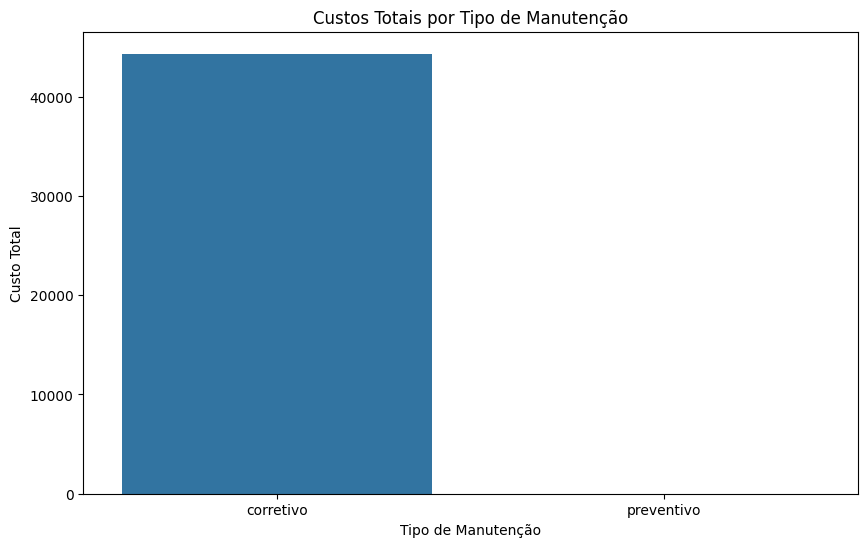

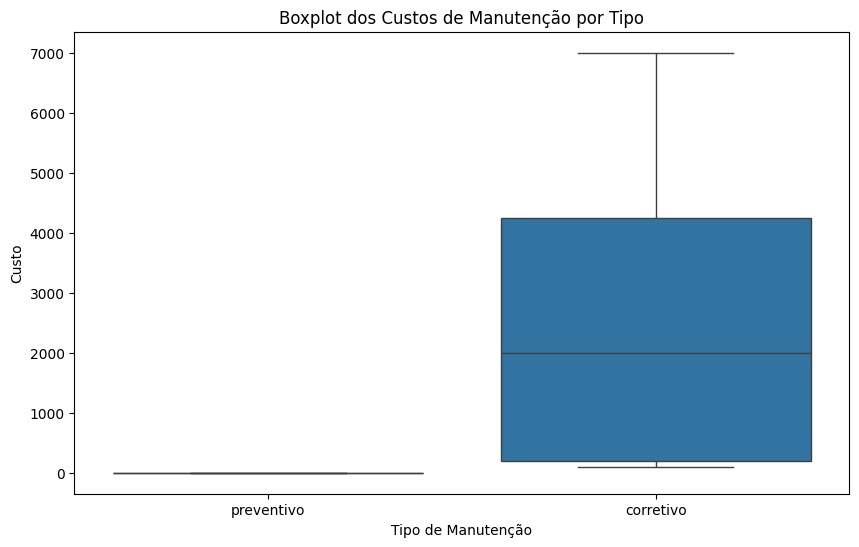

In [8]:
# passo 7 - visualizacoes
plt.figure(figsize=(10, 6))
sns.barplot(x=total_custos.index, y=total_custos.values)
plt.title('Custos Totais por Tipo de Manutenção')
plt.xlabel('Tipo de Manutenção')
plt.ylabel('Custo Total')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo de manutenção', y='custo', data=data)
plt.title('Boxplot dos Custos de Manutenção por Tipo')
plt.xlabel('Tipo de Manutenção')
plt.ylabel('Custo')
plt.show()

Custo Médio por Tipo de Manutenção:
tipo de manutenção
corretivo     2332.894737
preventivo       0.000000
Name: custo, dtype: float64
Frequência de Manutenções ao Longo do Tempo:
mes
2024-01    18
2024-02    13
2024-03     5
Freq: M, Name: count, dtype: int64
Comparação de Custos por Vendedor:
vendedor
ciclano    25625
fulano     18700
Name: custo, dtype: int64


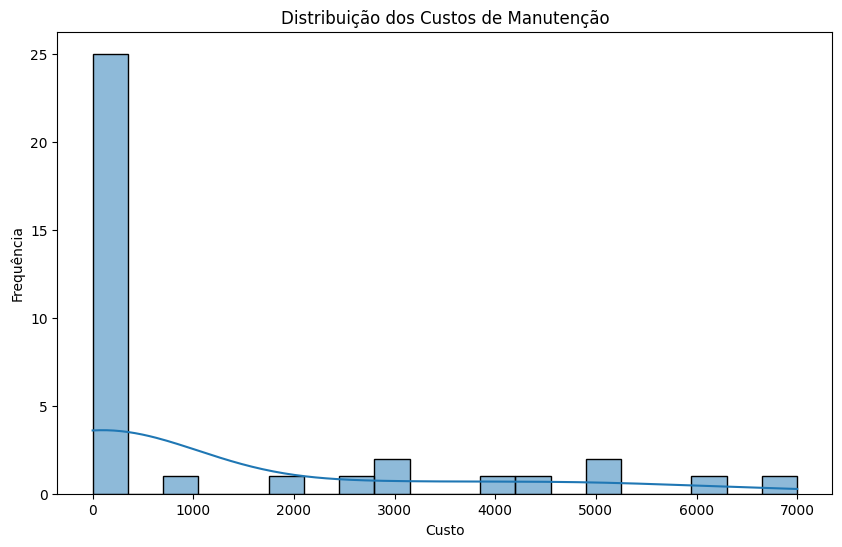

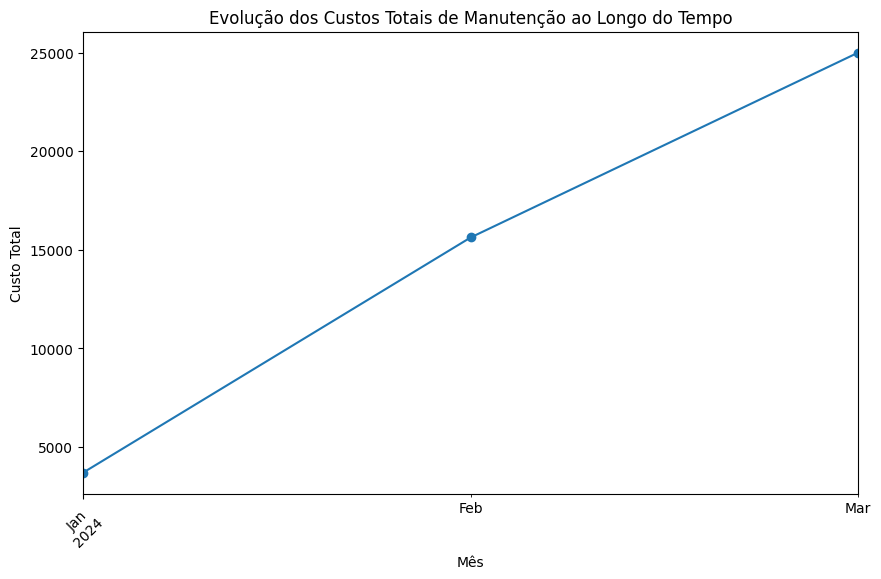

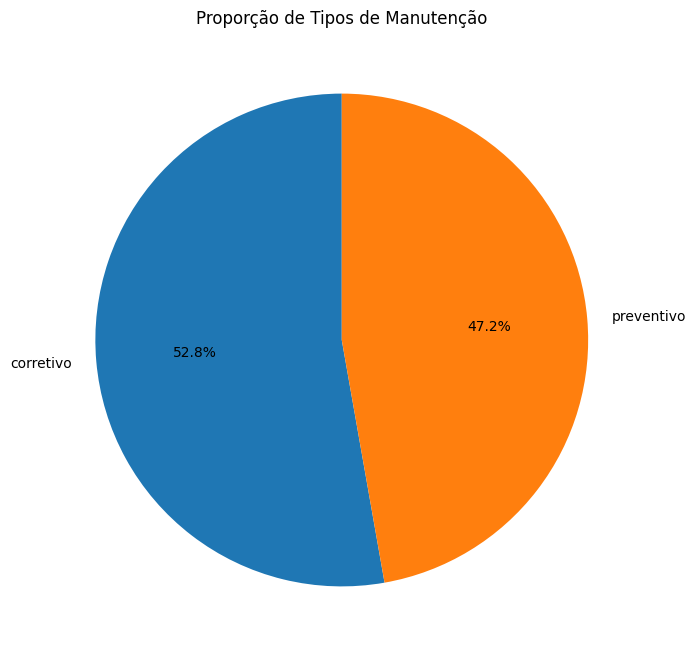

In [9]:
# mais visualizacoes e analises
# 1. Custo Médio por Tipo de Manutenção
custo_medio = data.groupby('tipo de manutenção')['custo'].mean()
print("Custo Médio por Tipo de Manutenção:")
print(custo_medio)

# 2. Frequência de Manutenções ao Longo do Tempo
data['mes'] = data['Data de entrada na assistencia tecnica'].dt.to_period('M')
frequencia_mensal = data['mes'].value_counts().sort_index()
print("Frequência de Manutenções ao Longo do Tempo:")
print(frequencia_mensal)

# 3. Comparação entre Vendedores
comparacao_vendedores = data.groupby('vendedor')['custo'].sum()
print("Comparação de Custos por Vendedor:")
print(comparacao_vendedores)

# 4. Histograma de Custos
plt.figure(figsize=(10, 6))
sns.histplot(data['custo'], bins=20, kde=True)
plt.title('Distribuição dos Custos de Manutenção')
plt.xlabel('Custo')
plt.ylabel('Frequência')
plt.show()

# 5. Gráfico de Linhas da Evolução dos Custos Totais
custo_mensal = data.groupby('mes')['custo'].sum()
plt.figure(figsize=(10, 6))
custo_mensal.plot(kind='line', marker='o')
plt.title('Evolução dos Custos Totais de Manutenção ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Custo Total')
plt.xticks(rotation=45)
plt.show()

# 6. Gráfico de Pizza para Proporção de Tipos de Manutenção
plt.figure(figsize=(8, 8))
data['tipo de manutenção'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Tipos de Manutenção')
plt.ylabel('')
plt.show()